In [5]:
pwd

'C:\\Users\\USER\\Documents\\1.11 May 2023\\Medical cost personal\\archive'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# We convert string to int (leba encoding)

In [11]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [12]:
# EDA to analys

In [13]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [14]:
# sex columns 

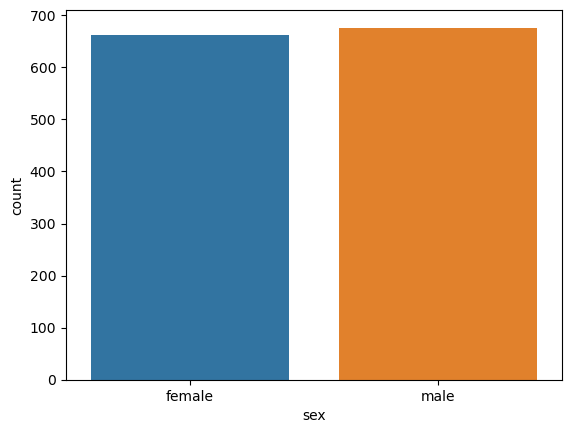

In [15]:
sns.countplot(x='sex',data=df)
plt.show()

In [16]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

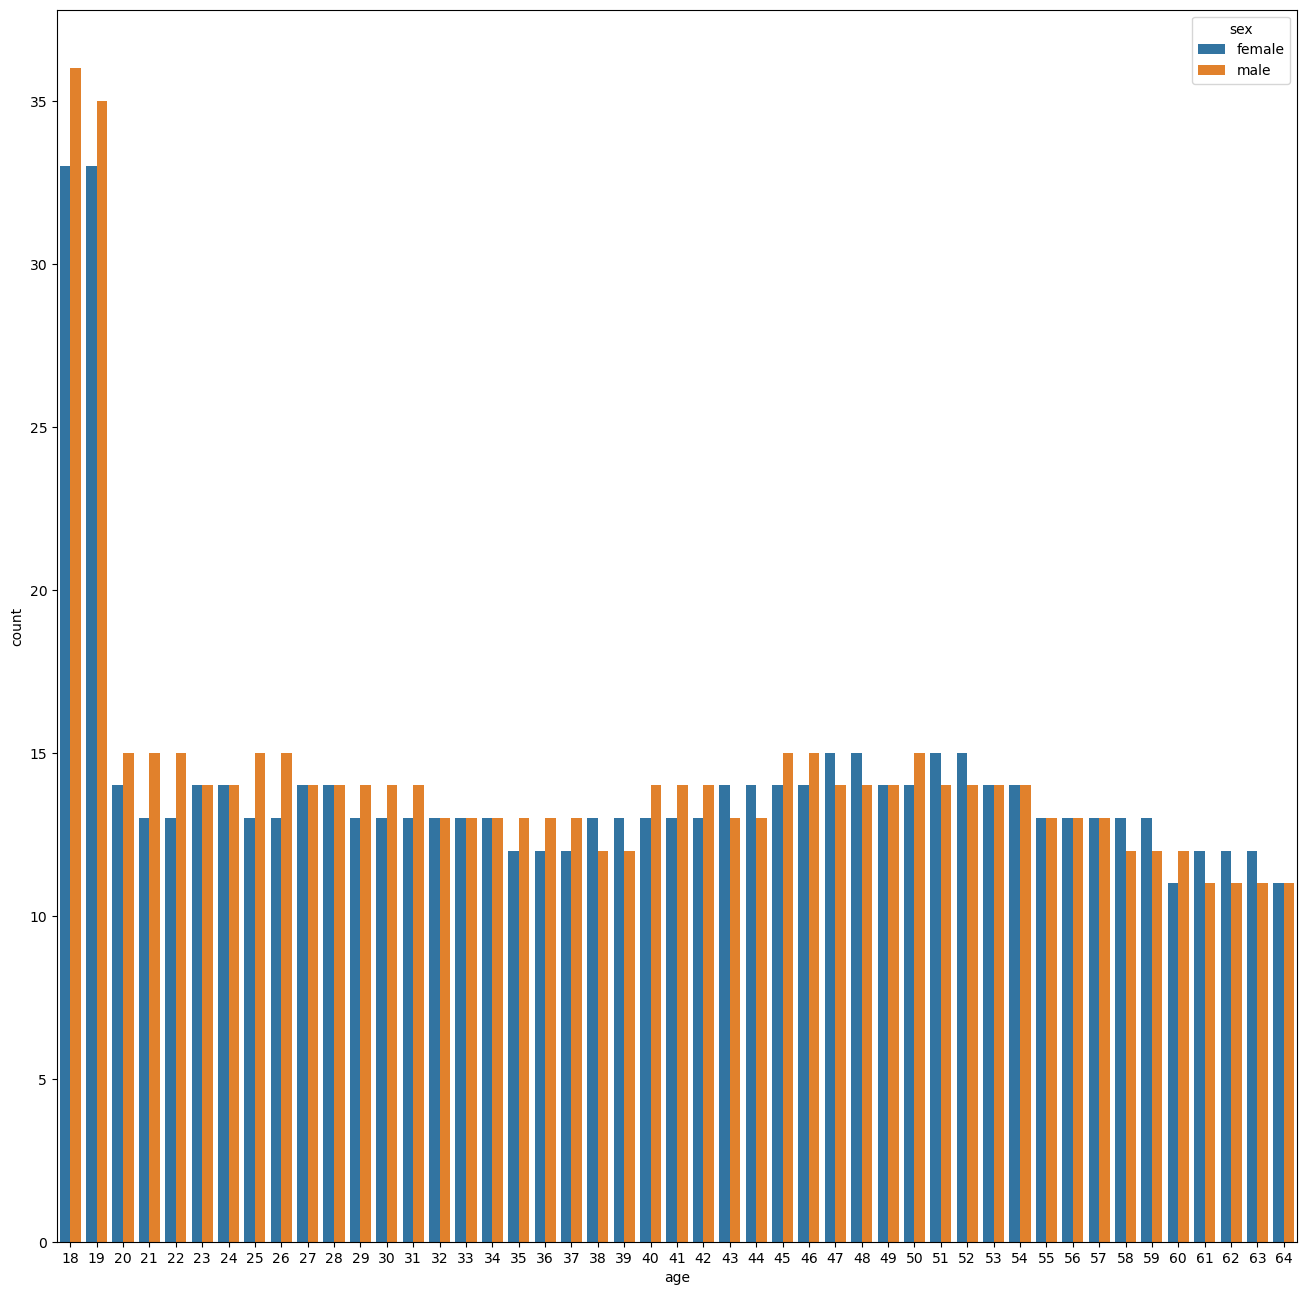

In [17]:
plt.figure(figsize=(16,16))
ax=sns.countplot(data=df,x='age',hue='sex')
plt.xticks=rotated=100

# so if you can see female has lesser than male

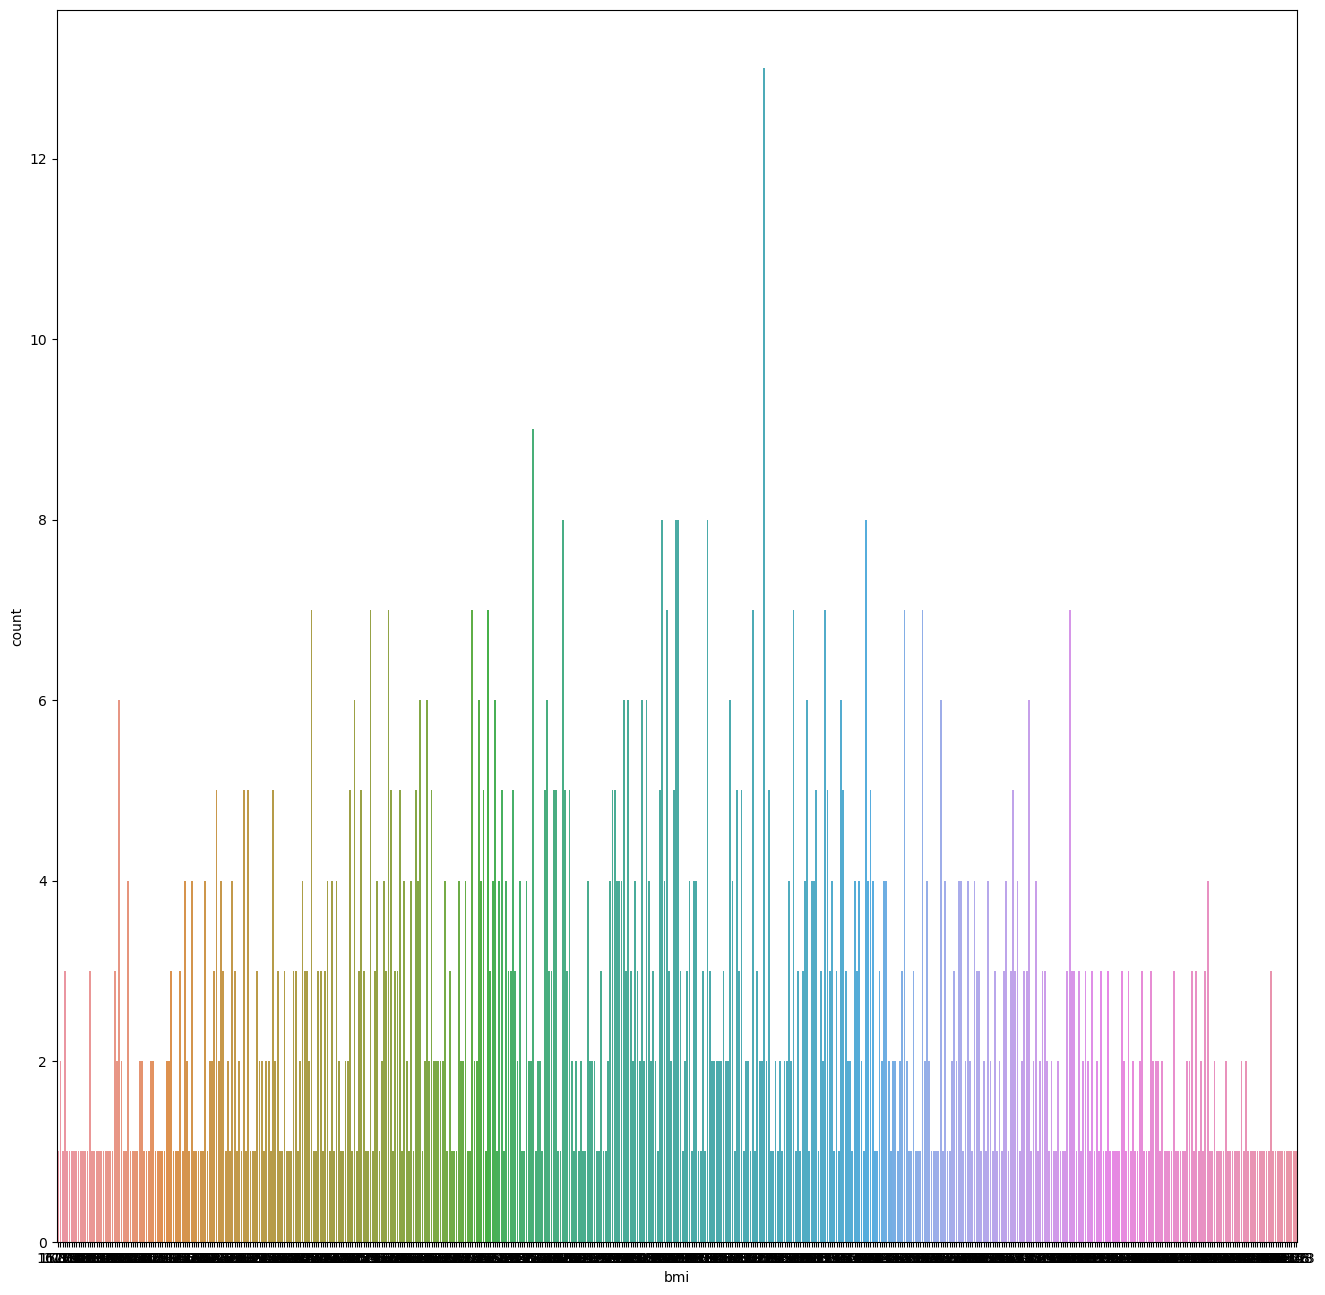

In [18]:
plt.figure(figsize=(16,16))
sns.countplot(x='bmi',data=df)
plt.xticks=rotated=100
plt.show()

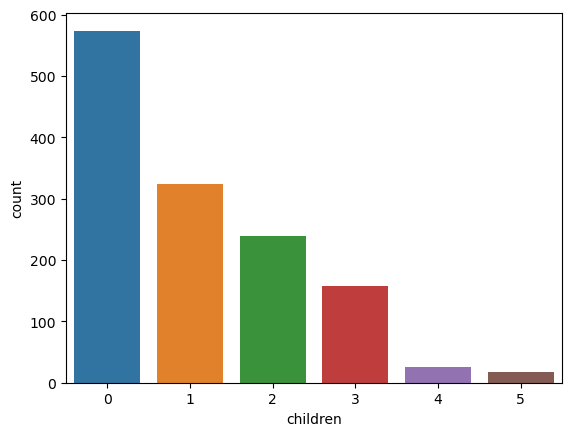

In [19]:
sns.countplot(x='children',data=df)
plt.show()

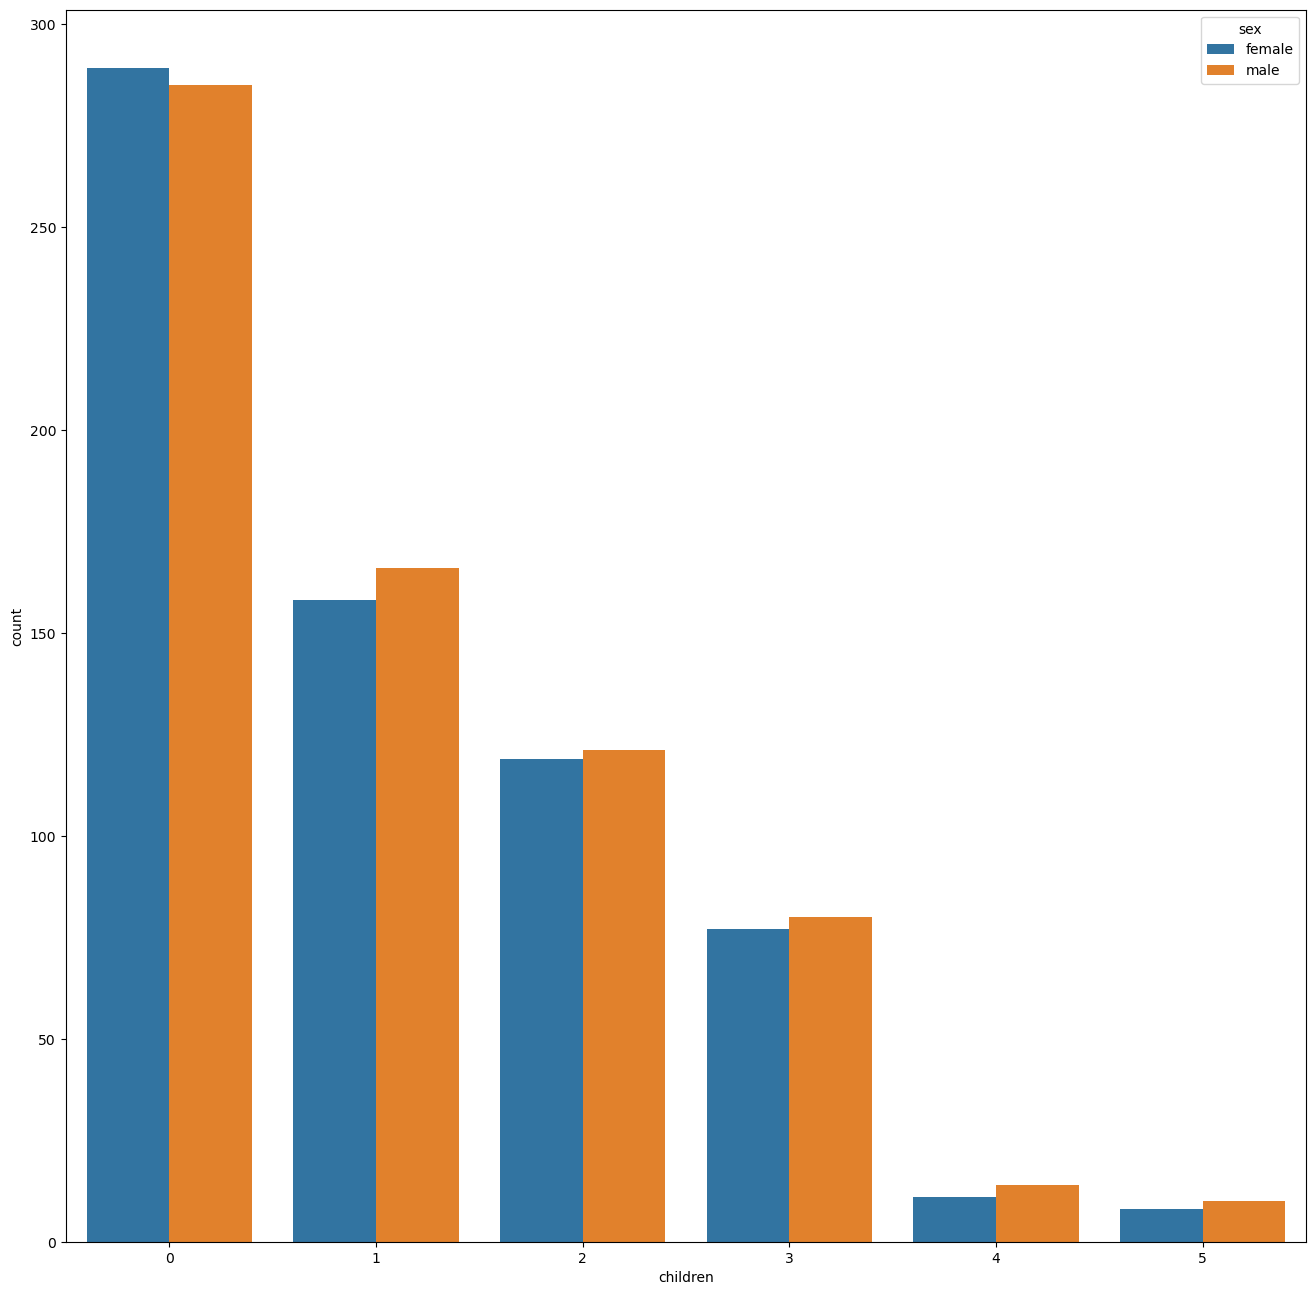

In [20]:
plt.figure(figsize=(16,16))
ax=sns.countplot(data=df,x='children',hue='sex')
plt.xticks=rotated=100

In [21]:
#smoker columns

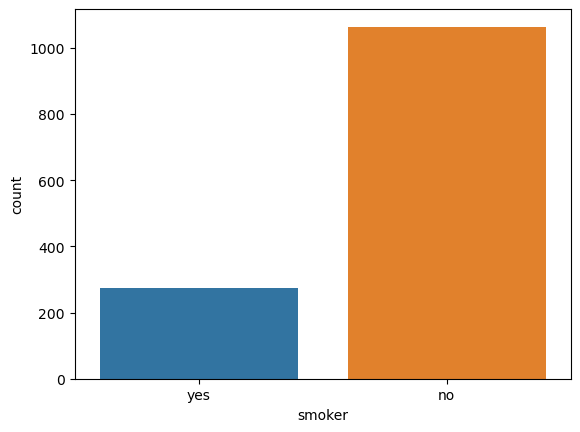

In [22]:
sns.countplot(x='smoker',data=df)
plt.show()

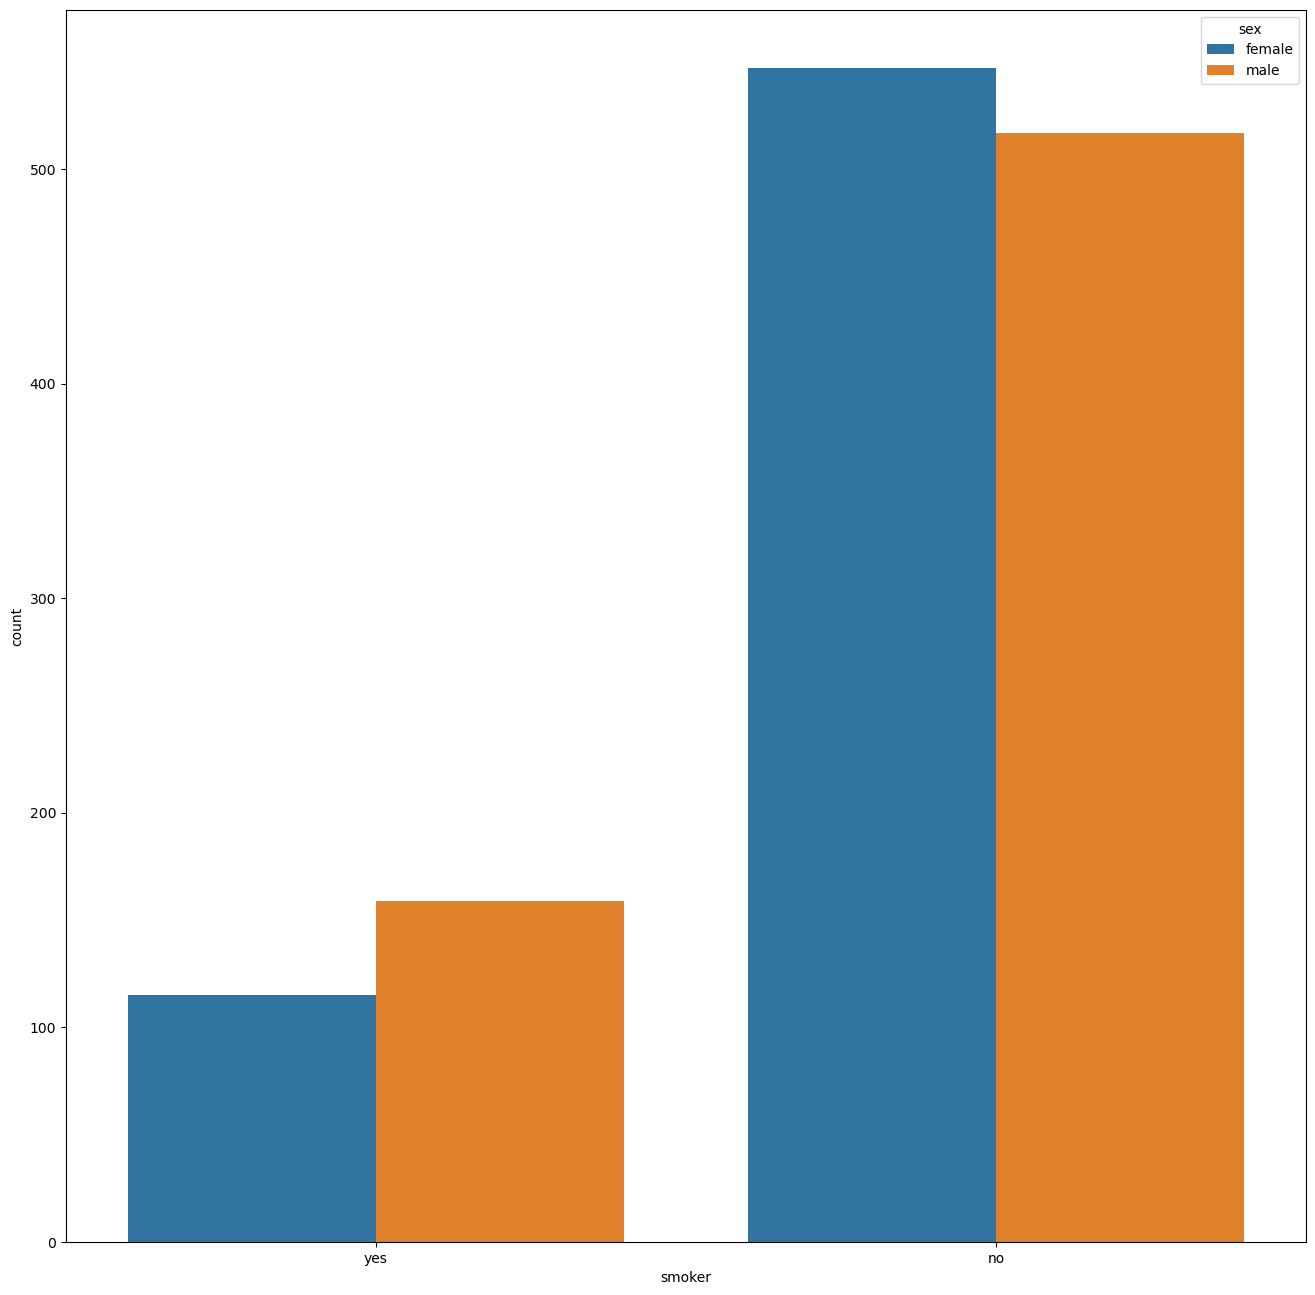

In [23]:
plt.figure(figsize=(16,16))
ax=sns.countplot(data=df,x='smoker',hue='sex')
plt.xticks=rotated=100

In [24]:
# in this chart large number of male or female are non smoker 

In [25]:
# region

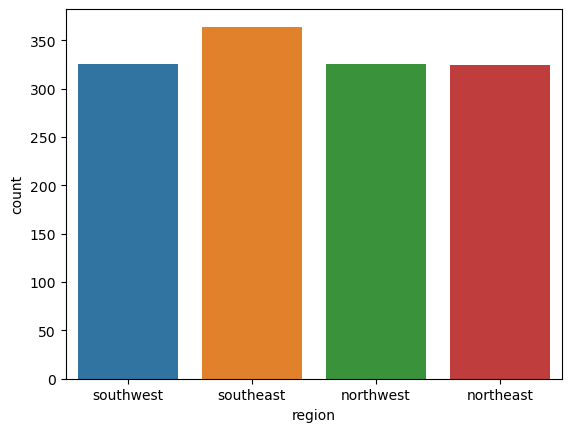

In [26]:
sns.countplot(x='region',data=df)
plt.show()

# we check aur data have outler or not 

<AxesSubplot:>

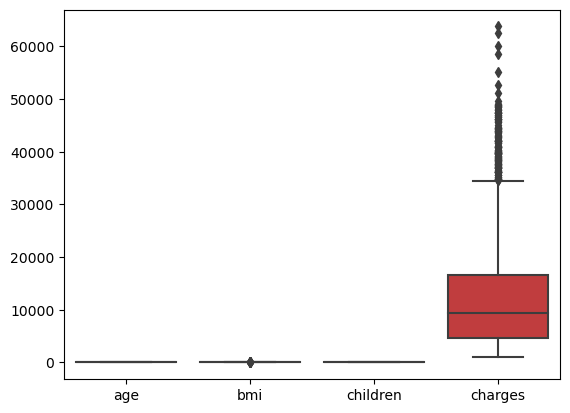

In [27]:
sns.boxplot(data=df)

In [28]:
#tretment of outliers

In [29]:
#trimming approch

In [30]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
Upper_fence=(q3+1.5*iqr)
Lower_fence=(q1-1.5*iqr)
print("Upper_fence \n",Upper_fence)
print("lower fence \n",Lower_fence)

Upper_fence 
 age            87.000000
bmi            47.290000
children        5.000000
charges     34489.350562
dtype: float64
lower fence 
 age            -9.000000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64


In [31]:
df2=df[~((df<Lower_fence)|(df>Upper_fence)).any(axis=1)]

C:\Users\USER\AppData\Local\Temp\ipykernel_20016\1924766591.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2=df[~((df<Lower_fence)|(df>Upper_fence)).any(axis=1)]


In [32]:
df.shape

(1338, 7)

In [33]:
df2.shape

(1193, 7)

In [34]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# we drop outliiers

In [35]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
# drop unuse columns

In [37]:
df2.drop(['region'],axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20016\3731522891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['region'],axis=1,inplace=True)


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1193 non-null   int64  
 1   sex       1193 non-null   object 
 2   bmi       1193 non-null   float64
 3   children  1193 non-null   int64  
 4   smoker    1193 non-null   object 
 5   charges   1193 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 65.2+ KB


In [39]:
# convert catogerical to int

In [40]:
df2.replace({'sex':{'male':1,'female':0}},inplace=True)
df2.replace({'smoker':{'yes':1,'no':0}},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20016\2882615163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'sex':{'male':1,'female':0}},inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20016\2882615163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'smoker':{'yes':1,'no':0}},inplace=True)


In [41]:
df2

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [42]:
df2.skew()

age         0.070826
sex         0.048693
bmi         0.262847
children    0.985049
smoker      2.406302
charges     1.175850
dtype: float64

#  3 to -3 lie on ths 

In [43]:
df2.kurt()

age        -1.252987
sex        -2.000986
bmi        -0.270955
children    0.308233
smoker      3.796652
charges     1.008412
dtype: float64

# 5 to -5 lie on this so we call it normal distribution 

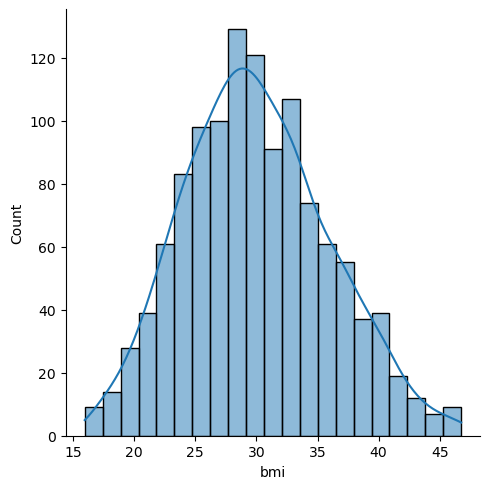

In [44]:
sns.displot(data=df2['bmi'],kde=True)
plt.show()

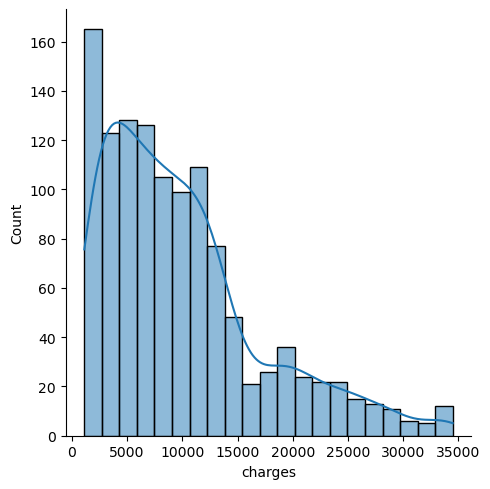

In [45]:
sns.displot(data=df2['charges'],kde=True)
plt.show()

In [46]:
# right distribution

# split the data

In [47]:
x=df2.drop(['charges'],axis=1)
y=df2['charges']

In [48]:
x, y

(      age  sex     bmi  children  smoker
 0      19    0  27.900         0       1
 1      18    1  33.770         1       0
 2      28    1  33.000         3       0
 3      33    1  22.705         0       0
 4      32    1  28.880         0       0
 ...   ...  ...     ...       ...     ...
 1333   50    1  30.970         3       0
 1334   18    0  31.920         0       0
 1335   18    0  36.850         0       0
 1336   21    0  25.800         0       0
 1337   61    0  29.070         0       1
 
 [1193 rows x 5 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1193, dtype: float64)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.80,random_state=2)

In [50]:
x_train.shape

(238, 5)

In [51]:
y_train.shape


(238,)

In [52]:
lin_mod=LinearRegression()

In [53]:
lin_mod.fit(x_train,y_train)

LinearRegression()

In [54]:
Y_train_predict=lin_mod.predict(x_train)

In [55]:
Y_train_predict

array([ 9950.37177392, 28759.237438  ,  7619.80294708,  9153.30336777,
       29317.17661085,  7188.78919112,  9688.63431587,  7904.06916063,
       11897.57056819,  6376.97700636, 10195.21762065,  9532.62881216,
        8794.92957753, 12578.14810374,  5542.53828854,  6775.59270781,
        2625.65557548, 17577.1964867 ,  5324.48093856,  5272.06979125,
       24212.36014073, 19972.89587371,  4361.8766232 , 12531.75263454,
        4793.13257168, 23480.56821333, 13355.73555903,  9432.40770692,
        3361.08311704, 14119.94099558,  9726.94705871,  3978.30082631,
        8302.15565889,  9115.4931728 , 10435.42272264,  5747.50708046,
        4766.54176571, 11230.15677116, 18476.05031006,  4502.92234921,
        6594.60212762,  5322.03241763,  2836.10790358,  2570.81229297,
       12469.27635961,  7715.11515217, 13161.63918904,  4464.97875156,
        2561.4041243 ,  9443.56373891, 22585.29472067,  3821.30498905,
        3784.48447002, 10637.2257619 , 27431.3077582 ,  3960.53010599,
      

In [56]:
y_train

1050     8023.13545
11      27808.72510
8        6406.41070
995      7986.47525
664     27037.91410
           ...     
523      5397.61670
345      6184.29940
554     17878.90068
592      2566.47070
1337    29141.36030
Name: charges, Length: 238, dtype: float64

In [58]:
from sklearn.metrics import r2_score
r2_score(y_train,Y_train_predict)

0.6042823911728235

# dealing with outliers

In [59]:
df3=df.copy()
df3.drop(['region'],axis=1,inplace=True)

In [60]:
df3

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [61]:
df3.replace({'sex':{'male':1,'female':0}},inplace=True)
df3.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [62]:
X=df3.drop(['charges'],axis=1)
Y=df3['charges']

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=2)

In [64]:
lin_mod=LinearRegression()

In [65]:
lin_mod.fit(X_train,Y_train)

LinearRegression()

In [66]:
y_train_predict=lin_mod.predict(X_train)

In [67]:
y_train_predict

array([  438.48927565,  9007.53018514, 13265.208111  , ...,
       17298.26025725,  9753.96279907, 13626.55730754])

In [68]:
Y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [69]:
r2_score(Y_train,y_train_predict)

0.7511416233816596

#  conclusion in this data set you found when you train the dataset with outliers your accuracy has high (.7511) and when you delete the outlier accurcy is (.604)